## Kpi's Final and order ##



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import date, time, datetime, timedelta 

In [2]:
#defining the transformation from month to number of season 
def transform_month_to_season(x): 
    if x=='January' or x=='February' or x=='December': 
        return 3 
    if x=='March' or x=='April' or x=='May': 
        return 0
    if x=='June' or x=='July' or x=='August':
        return 1
    if x=='September' or x=='October' or x=='November':
        return 2

In [3]:
Dataset = pd.read_csv("boston_2019.csv", sep=',')
#first we will reound the time for each hour to have a better sight 
#rounding time 
df = pd.DataFrame(Dataset['start_time'])
df['start_time'] = pd.to_datetime(df.start_time)

# round start_time values to next nearest hour
# name it datetime so that it can be merged with the dates of the weather dataset
df['date_time'] = df['start_time'].dt.round('60min')
df = df.drop('start_time', axis='columns')
df['user'] = Dataset['user_type']

df['hour'] = df['date_time'].dt.hour

#we will add to the data frame a new column calle day to see 
#on how many bikes on each day of the week were rented (not over the year) 
df['day'] = df['date_time'].dt.day_name()
df['day'] = pd.Categorical(df['day'], categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered = True)

#add month column to see te month of the row
df['month'] = df['date_time'].dt.month_name()
#to make the months in order
df['month'] = pd.Categorical(df['month'], categories = ['January','February','March','April','May','June','July','August','September','October','November','December'],ordered = True)

#to check how many rents over the weeks on a year
df['week_of_the_year'] = df['date_time'].dt.isocalendar().week

#to check how many rents over the season 
df['season'] = df['month'].apply(transform_month_to_season)




Text(0, 0.5, 'Rents')

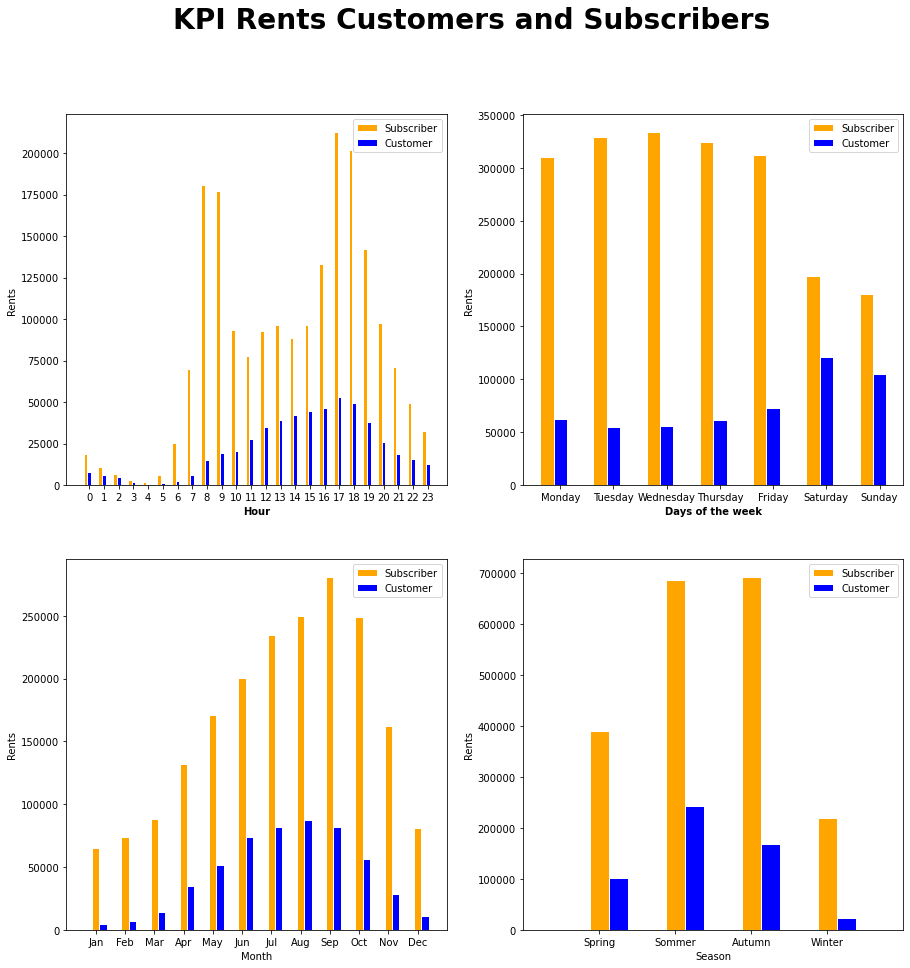

In [4]:
#to have enought place 
fig = plt.figure(figsize=(15, 15))
fig.suptitle("KPI Rents Customers and Subscribers", fontsize=28, fontweight='bold')

#Preparing the data  
kpi_csrents_hour = df.groupby(["hour","user"]).size()
kpi_csrents_day = df.groupby(["day","user"]).size()
kpi_csrents_month = df.groupby(["month","user"]).size()
kpi_csrents_season = df.groupby(["season","user"]).size()

# To get an ovierview for the seasons in a 'good' order, values of the months are labeled with numbers:
# 0 - Spring
# 1 - Summer
# 2 - Autumn
# 3 - Winter

#-----------------------------------------------------------------------------
#First subgraphic 
subplotCsrentsHour = fig.add_subplot(2,2,1)
#making the graphik
# set width of bar
barWidth = 0.25

# set height of bar
bars1= kpi_csrents_hour.loc[(kpi_csrents_hour.index.get_level_values('user') =="Subscriber")].values
bars2 = kpi_csrents_hour.loc[(kpi_csrents_hour.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], kpi_csrents_hour.index.get_level_values('hour').unique())

# Create legend & Show graphic
plt.legend()
plt.xlabel("Hour")
plt.ylabel("Rents")

#--------------------------------------------------------------------------------

#second graphic 
subplotCsrentsDay = fig.add_subplot(2,2,2)
#make the graphik
# set width of bar
barWidth = 0.25

# set height of bar
bars1 = kpi_csrents_day.loc[(kpi_csrents_day.index.get_level_values('user') =="Subscriber")].values
bars2 = kpi_csrents_day.loc[(kpi_csrents_day.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], kpi_csrents_day.index.get_level_values('day').unique())

# Create legend & Show graphic
plt.legend()
plt.xlabel("Days of the week")
plt.ylabel("Rents")

#---------------------------------------------------------------------------

#Third Graphic 
subplotCsrentsMonth = fig.add_subplot(2,2,3) 

#making the graphik
# set width of bar
barWidth = 0.25

# set height of bar
bars1= kpi_csrents_month.loc[(kpi_csrents_month.index.get_level_values('user') =="Subscriber")].values
bars2 = kpi_csrents_month.loc[(kpi_csrents_month.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
subplotCsrentsMonth.set_xlim([-1,12])
ax_subplotMonth = np.arange(0, 12)
subplotCsrentsMonth.set_xticks(ax_subplotMonth)
subplotCsrentsMonth.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Create legend & Show graphic
plt.legend()
plt.xlabel("Month")
plt.ylabel("Rents")

#---------------------------------------------------------

#Fourth Graphic
#Third Graphic 
subplotCsrentsSeason = fig.add_subplot(2,2,4) 

#making the graphik
# set width of bar
barWidth = 0.25

# set height of bar
bars1= kpi_csrents_season.loc[(kpi_csrents_season.index.get_level_values('user') =="Subscriber")].values
bars2 = kpi_csrents_season.loc[(kpi_csrents_season.index.get_level_values('user') =="Customer")].values


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='Subscriber')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Customer')

# Add xticks on the middle of the group bars
#plt.xlabel('group')
#plt.xticks([r + barWidth for r in range(len(bars1))], kpi_csrents_month.index.get_level_values('month').unique())
subplotCsrentsSeason.set_xlim([-1,4])
ax_subplotSeason = np.arange(0, 4)
subplotCsrentsSeason.set_xticks(ax_subplotSeason)
subplotCsrentsSeason.set_xticklabels(['Spring','Sommer','Autumn','Winter'])

# Create legend & Show graphic
plt.legend()
plt.xlabel("Season")
plt.ylabel("Rents")



In [5]:
# Save the picture as PNG and PDF file
fig.savefig('KPI_Rents_CaS.pdf', dpi=300)
fig.savefig('KPI_Rents_CaS.png', dpi=300)

In [6]:
#new data frame to check the average drive time
df2 = pd.DataFrame(Dataset['start_time'])
df2['start_time'] = pd.to_datetime(df2.start_time)

#we will need start time as well as end time to 
#calculate the drove time
df2['end_time'] = pd.to_datetime(Dataset['end_time']) 

#new column will be added witch the time on a date format
df2['drive_time_in_date'] = df2['end_time']-df2['start_time']

#new column transforming each date format of the drive to seconds
df2['time_in_seconds'] = df2['drive_time_in_date'].dt.total_seconds() 

#new column of drive time in second to minutes 
df2['time_in_minutes'] = df2['time_in_seconds']/60

#we need now a new column with the rounded time
df2['date_time'] = df2['start_time'].dt.floor('60min')

df2['Day'] = df2['date_time'].dt.day_name()
df2['Day'] = pd.Categorical(df2['Day'], categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered = True)

#creating another column named month to have each month number 
df2['Month'] = df2['date_time'].dt.month_name()
#to make the months in order
df2['Month'] = pd.Categorical(df2['Month'], categories = ['January','February','March','April','May','June','July','August','September','October','November','December'],ordered = True)

#data of average time of every week of the year
df2 ['week'] = df2['date_time'].dt.isocalendar().week
data8 = df2.groupby("week")['time_in_minutes'].mean().reset_index()



<BarContainer object of 4 artists>

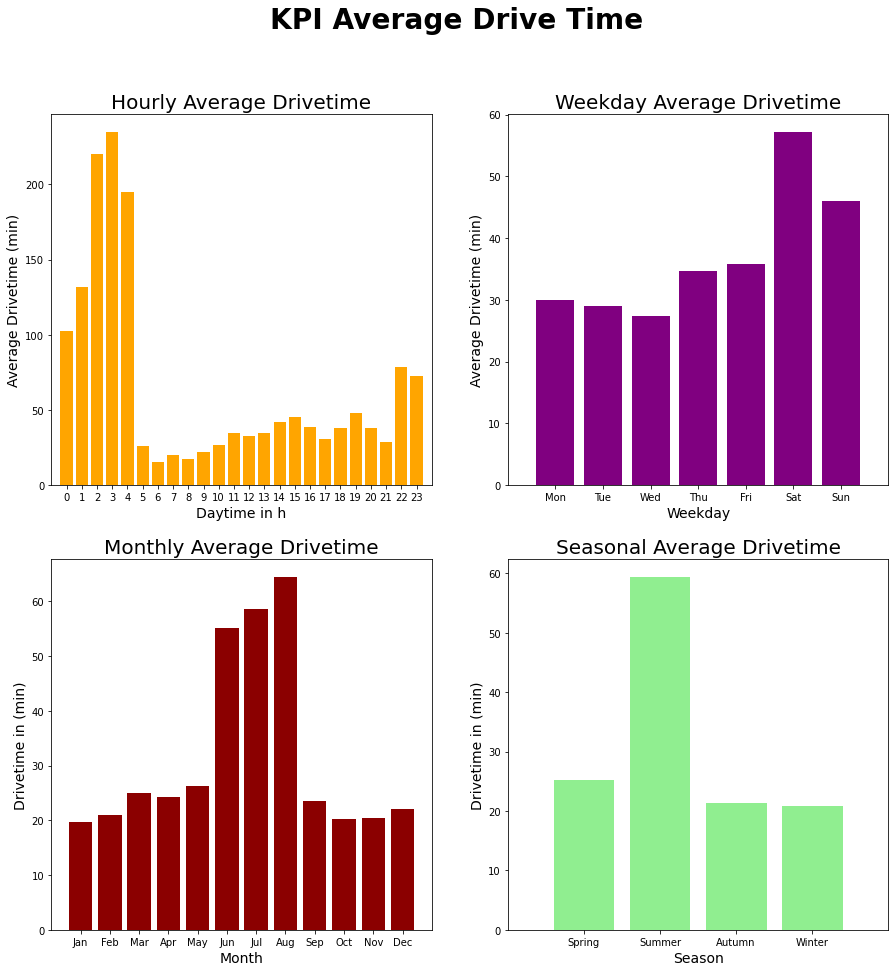

In [7]:
#to have enought place 
fig = plt.figure(figsize=(15, 15))
fig.suptitle("KPI Average Drive Time", fontsize=28, fontweight='bold')

kpi_avg_hour = df2.groupby(df2.date_time.dt.hour)['time_in_minutes'].mean().reset_index()
kpi_avg_dayweek = df2.groupby("Day")['time_in_minutes'].mean().reset_index()
kpi_avg_month = df2.groupby("Month")['time_in_minutes'].mean().reset_index()
kpi_avg_season = kpi_avg_month

# To get an ovierview for the seasons in a 'good' order, values of the months are labeled with numbers:
# 0 - Spring
# 1 - Summer
# 2 - Autumn
# 3 - Winter
# After that data is grouped by the new labels and the mean is calculated
kpi_avg_season['season'] = [3, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3]
kpi_avg_season = kpi_avg_season.groupby("season")['time_in_minutes'].mean().reset_index()

#-------------------------------------------------------------------
# Design of first subplot, average daytime values:
subplotDaytime = fig.add_subplot(2,2,1)
subplotDaytime.set_title('Hourly Average Drivetime', fontsize=20)
subplotDaytime.set_ylabel('Average Drivetime (min)', fontsize=14)
subplotDaytime.set_xlabel('Daytime in h', rotation = 0, fontsize=14)
subplotDaytime.set_xlim([-1,24])
ax_subplotDaytime = np.arange(0, 24)
subplotDaytime.set_xticks(ax_subplotDaytime)
subplotDaytime.bar(ax_subplotDaytime, kpi_avg_hour['time_in_minutes'], color='orange')

#-----------------------------------------------------------------
#design of the second subplot, average weekday values:
subplotWeekday = fig.add_subplot(2,2,2)
subplotWeekday.set_title('Weekday Average Drivetime', fontsize=20)
subplotWeekday.set_ylabel('Average Drivetime (min)', fontsize=14)
subplotWeekday.set_xlabel('Weekday', rotation = 0, fontsize=14)
subplotWeekday.set_xlim([-1,7])
ax_subplotWeekday = np.arange(0, 7)
subplotWeekday.set_xticks(ax_subplotWeekday)
subplotWeekday.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
subplotWeekday.bar(ax_subplotWeekday, kpi_avg_dayweek['time_in_minutes'], color='purple')

#-----------------------------------------------------------------
# Design of third subplot, average month values:
subplotMonth = fig.add_subplot(2,2,3)
subplotMonth.set_title('Monthly Average Drivetime', fontsize=20)
subplotMonth.set_ylabel('Drivetime in (min)', fontsize=14)
subplotMonth.set_xlabel('Month', rotation = 0, fontsize=14)
subplotMonth.set_xlim([-1,12])
ax_subplotMonth = np.arange(0, 12)
subplotMonth.set_xticks(ax_subplotMonth)
subplotMonth.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
subplotMonth.bar(ax_subplotMonth, kpi_avg_month['time_in_minutes'], color='darkred')

#-------------------------------------------------------------------------
# Design of fourth subplot, average seasonal values:
subplotSeason = fig.add_subplot(2,2,4)
subplotSeason.set_title('Seasonal Average Drivetime', fontsize=20)
subplotSeason.set_ylabel('Drivetime in (min)', fontsize=14)
subplotSeason.set_xlabel('Season', rotation = 0, fontsize=14)
subplotSeason.set_xlim([-1,4])
ax_subplotSeason = np.arange(0, 4)
subplotSeason.set_xticks(ax_subplotSeason)
subplotSeason.set_xticklabels(['Spring','Summer','Autumn','Winter'])
subplotSeason.bar(ax_subplotSeason, kpi_avg_season['time_in_minutes'], color='lightgreen')

In [8]:
# Save the picture as PNG and PDF file
fig.savefig('KPI_Avg_Drivetime.pdf', dpi=300)
fig.savefig('KPI_Avg_Drivetime.png', dpi=300)